In [1]:
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style

In [2]:
bday = pd.read_csv('nfl_birthdays.csv', index_col=0)
bday = bday.reset_index(drop=False)
bday.head()

,index,rank_row,player,position,born,first_year,last_year,ap1,pb,st,...,sk_yds,run_att,run_yds,run_td,run_long,rec_rec,rec_yds,rec_td,rec_lng,month
0,0,1,Grady Allen,LB,1946,1968,1972,0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,2,Ralph Anderson,E,1937,1958,1960,0,0,2,...,NaN,NaN,NaN,NaN,NaN,55.0,791.0,6.0,46.0,1
2,2,3,Teddy Andrulewicz,WB,1905,1930,1930,0,0,0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1
3,3,4,Justin Armour,WR,1973,1995,1999,0,0,1,...,0.0,4.0,-5.0,0.0,6.0,64.0,861.0,7.0,54.0,1
4,4,5,Marvin Austin,DL,1989,2012,2014,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Check Normality Assumptions

In [3]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

Hypothesis
* Ho: mu(Q1 bdays) - mu(Q2-Q4 bday) = 0
* Ha: mu(Q1 bdays) - mu(Q2-Q4 bday) != 0

In [4]:
q1_bday = bday[(bday.month <= 4) & (bday.born >= 1980)].month
rest_bday = bday[(bday.month > 4) & (bday.born >= 1980)].month

In [5]:
x = np.random.choice(bday.month, size=1000 , replace=False)
y = np.random.choice(bday.month, size=1000 , replace=False)

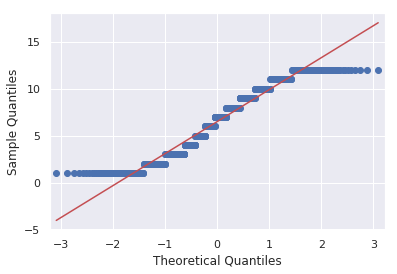

In [6]:
# q-q plot
qqplot(x, line='s')
pyplot.show()

(array([158., 107.,  71.,  72.,  73.,  87.,  99.,  98.,  81., 154.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

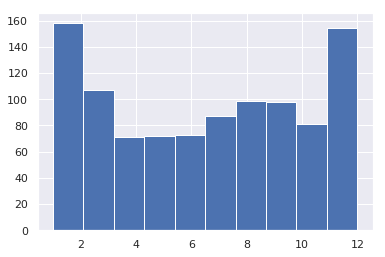

In [7]:
plt.hist(x)

it appears that we have a bimodal distribtution. 

In [8]:
from scipy.stats import shapiro

# shapiro normality test
stat, p = shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.941, p=0.000
Sample does not look Gaussian (reject H0)


### Testing Data for Normality (Kurtosis and Skewness)

Since the data from the Q-Q plot and histrogram above appear to not resemble a normal distribution, lets take a further in testing for normality, specifically:
- __Kurtosis__ which provides values on how flat or peak in respects ot the normal distribution
- __Skewness__ which measures the horizontal symmetry of the data with respects to the normal distribution. 

/home/redne/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


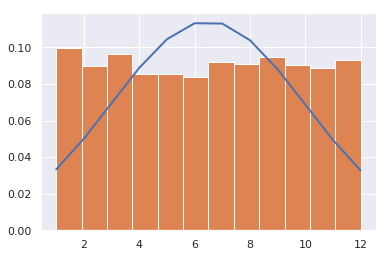

In [17]:
# http://www.pythonforfinance.net/2016/04/04/python-skew-kurtosis/

import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(x)
h = sorted(h)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 

#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2)
plt.hist(h,normed=True,bins = 12)      
plt.show()

This appears to be quite flat, but its a little difficult ot tell if there is any skewness. Lets run a the `skew()` and `kurt()` function to obtain numerical results:

In [21]:
print('Skew =', stats.skew(x))
print('Kurtosis =', stats.kurtosis(x))

Skew = -0.03158644438460896
Kurtosis = -1.2187918406102412


TODO: Interpretations of results... 

## Permutation Test

Difference in Mean

In [20]:
diff_mean = q1_bday.mean() - rest_bday.mean()
diff_mean

-6.052595070364846

The difference in mean fo

In [44]:
# number of permutations required for the permutaiton test
nperm = 1000

# create list ot hold average mean values during permutation test
perm_result = []

for i in range(0,nperm):
    q1_sample = np.random.choice(bday.month, size=100 , replace=False)     # randomly assign Q1 birthdays to sample group
    rest_sample = np.random.choice(bday.month, size=100 , replace=False)   # randomly assign Q2-Q4 birthdayssample group
    sample_diff = q1_sample.mean() - rest_sample.mean()                    # compute difference in sample menas
    perm_result.append(sample_diff)
    
print("Number of values greater than the observed mean difference: ", len([i for i in perm_result if i > diff_mean]))

Number of values greater than the observed mean difference:  1000


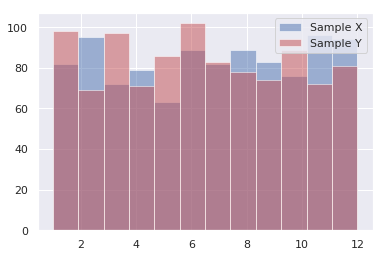

In [14]:
plt.hist(x, bins=12, alpha=0.5, color='b')
plt.hist(y, bins=12,alpha=0.5, color='r')
leg = ['Sample X', 'Sample Y']
plt.legend(leg)
plt.show()